## 1b

In [256]:

from ortools.linear_solver import pywraplp


def LinearProgrammingExample():
    solver = pywraplp.Solver.CreateSolver('GLOP')
    if not solver:
        return

    x = solver.NumVar(0, solver.infinity(), 'x')
    y = solver.NumVar(0, solver.infinity(), 'y')
  

    print('Number of variables =', solver.NumVariables())

    solver.Add(x + y <= 45.0)

    solver.Add(6 * x + 10*y <= 350.0)


    print('Number of constraints =', solver.NumConstraints())
    
    #Obj
    solver.Maximize(90 * x + 100*y)

    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print('Solution:')
        print('Objective value =', solver.Objective().Value())
        print('x =', x.solution_value())
        print('y =', y.solution_value())
       
    else:
        print('No optimal solution.')
LinearProgrammingExample()

Number of variables = 2
Number of constraints = 2
Solution:
Objective value = 4250.0
x = 24.99999999999999
y = 20.00000000000001


## 1c 

In [402]:
from ortools.linear_solver import pywraplp


def LinearProgrammingExample():
    solver = pywraplp.Solver.CreateSolver('GLOP')
    if not solver:
        return

    x = solver.NumVar(0, solver.infinity(), 'x')
    y = solver.NumVar(0, solver.infinity(), 'y')
  


    solver.Add(x + y <= 45.0)

    solver.Add(6 * x + 10*y <= 350.0)


    
    #Obj
    solver.Maximize(70 * x + 100*y)

    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print('Objective value when wheat is at $26 = $', solver.Objective().Value())
        print('x =', x.solution_value())
        print('y =', y.solution_value())
       
    else:
        print('No optimal solution.')
LinearProgrammingExample()

Objective value when wheat is at $26 = $ 3750.0000000000005
x = 24.99999999999999
y = 20.00000000000001


In [317]:
def LinearProgrammingExample():
    solver = pywraplp.Solver.CreateSolver('GLOP')
    if not solver:
        return

    x = solver.NumVar(0, solver.infinity(), 'x')
    y = solver.NumVar(0, solver.infinity(), 'y')
  
    solver.Add(x + y <= 45.0)

    solver.Add(6 * x + 10*y <= 350.0)

    
    #Obj
    solver.Maximize(61 * x + 100*y)

    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print('Solution:')
        print('Objective value when wheat constrant is at lower bound =', solver.Objective().Value())
        print('x =', x.solution_value())
        print('y =', y.solution_value())
       
    else:
        print('No optimal solution.')
LinearProgrammingExample()

def LinearProgrammingExample():
    solver = pywraplp.Solver.CreateSolver('GLOP')
    if not solver:
        return

    x = solver.NumVar(0, solver.infinity(), 'x')
    y = solver.NumVar(0, solver.infinity(), 'y')
  
    solver.Add(x + y <= 45.0)

    solver.Add(6 * x + 10*y <= 350.0)

    
    #Obj
    solver.Maximize(99 * x + 100*y)

    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        
        print('Objective value when wheat constrant is at upper bound =', solver.Objective().Value())
        print('x =', x.solution_value())
        print('y =', y.solution_value())
       
    else:
        print('No optimal solution.')
LinearProgrammingExample()

Solution:
Objective value when wheat constrant is at lower bound= 3525.0000000000005
x = 24.99999999999999
y = 20.00000000000001
Solution:
Objective value when wheat constrant is at upper bound= 4475.0
x = 24.99999999999999
y = 20.00000000000001


## 1d

In [331]:
def LinearProgrammingExample():
    solver = pywraplp.Solver.CreateSolver('GLOP')
    if not solver:
        return

    x = solver.NumVar(0, solver.infinity(), 'x')
    y = solver.NumVar(0, solver.infinity(), 'y')
  
    solver.Add(x + y <= 40.0)

    solver.Add(6 * x + 10*y <= 350.0)


    
    #Obj
    solver.Maximize(90 * x + 100*y)

    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
    
        print('Objective value when 40 acres of land are available =', solver.Objective().Value())
        print('x =', x.solution_value())
        print('y =', y.solution_value())
       
    else:
        print('No optimal solution.')
LinearProgrammingExample()

Objective value when 40 acres of land are available = 3875.0
x = 12.500000000000002
y = 27.499999999999996


## 3.1

In [336]:
#3.1a
import pandas as pd
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

#objective function
obj = [109, 94.8, 99.5, 93.1, 97.2, 96.3,92.9, 110, 104, 101, 107,102,95.2, 0, 0, 0, 0, 0, 0 ]

#Constraints vector

lhs_eq = [
    [10, 7, 8, 6, 7,6, 5, 10, 8, 6,10,7,100, -1, 0, 0, 0, 0, 0],
    [10, 7, 8, 6, 7,6, 5, 10, 8, 6,110,107,0, 1, -1, 0, 0, 0,0],
    [10, 7, 8, 6, 7,6, 5, 110,108,106,0,0,0, 0, 1, -1, 0, 0,0],
    [10, 7, 8, 6, 7,106, 105, 0,0,0,0,0,0, 0, 0, 1, -1,0,0],
    [10, 7, 8, 106, 107, 0, 0, 0, 0, 0, 0, 0, 0, 0,0,0,1, -1, 0],
    [110, 107, 108, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0,0,0, 1, -1]
]

rhs_eq = [
    500,
    200,
    800,
    200,
    800,
    1200
]

#bounds and optimiser
bounds = [(0, float("inf")) for x in range(len(obj))]
opt = linprog(c=obj,
               A_eq=lhs_eq, b_eq=rhs_eq, bounds=bounds,
               method="simplex")

holdings_array=opt.x
original=opt.fun

print('Cost of bond portfolio: $',opt.fun)
print('Amount saved from optimising instead of just depositing full cash flow amount: $',sum(rhs_eq)-opt.fun)
# Organise bond allocations into DataFrame
holdings={}
holdings_name=['Bond1','Bond2','Bond3','Bond4','Bond5',
               'Bond6','Bond7','Bond8','Bond9','Bond10',
               'Bond11','Bond12','Bond13','Surplus1','Surplus2','Surplus3',
              'Surplus4','Surplus5','Surplus6']
   
for i in range(0,len(holdings_name)):
    holdings[holdings_name[i]]=holdings_array[i]
holdings

df = pd.DataFrame.from_dict([holdings])
df=df.T
df.rename(columns={0: "Quantity"})


Cost of bond portfolio: $ 2754.2844571158134
Amount saved from optimising instead of just depositing full cash flow amount: $ 945.7155428841866


,Quantity
Bond1,0.000000
Bond2,0.000000
Bond3,11.111111
Bond4,0.000000
Bond5,6.645898
Bond6,0.609338
Bond7,0.000000
Bond8,0.000000
Bond9,6.119757
Bond10,0.000000


## 3.1c

lambda list: [0.9519999999997708, 0.8861818181817398, 0.8268013468009485, 0.7576424623589446, 0.6845011271830117, 0.6170646848499928]
Interest rate term structure: [0.05042016806747984, 0.06227896636433283, 0.0654496756964289, 0.07184978032989675, 0.07876082432950904, 0.08378936399849501]


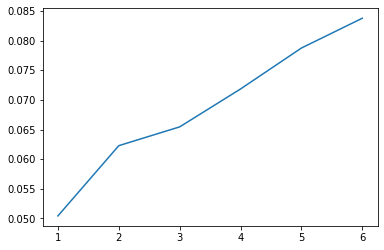

In [338]:
lambda_list=[]
rate_list=[]
rhs_eq_shadow=rhs_eq

for i in range(0,6):
    rhs_eq = [500,200,800,200,800,1200]
    rhs_eq[i]=rhs_eq[i]+1
    bounds = [(0, float("inf")) for x in range(len(obj))]
    opt = linprog(c=obj,
               A_eq=lhs_eq, b_eq=rhs_eq, bounds=bounds,
               method="simplex")
    
    lambda_=opt.fun-original
    lambda_list.append(lambda_)
    rate=(1/(lambda_**(1/(i+1))))-1
    rate_list.append(rate)
print('lambda list:',lambda_list)
print('Interest rate term structure:',rate_list)


plt.plot([1,2,3,4,5,6],rate_list)

## 3.1d

lambda list: [0.8387096774195015, 0.8387096774195015, 0.8387096774195015, 0.7649462365588988, 0.6925806451613425, 0.6260225103005723]
Interest rate term structure: [0.1923076923074838, 0.0919284281982422, 0.060383062071035054, 0.06928203898812324, 0.07623207171752933, 0.08118914067292904]


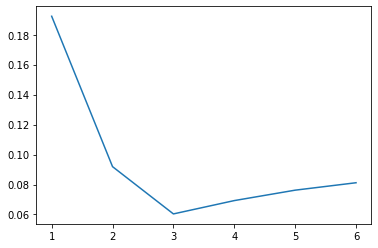

In [340]:
#objective function
obj = [109, 94.8, 99.5, 93.1, 97.2, 96.3,92.9, 110, 104, 101, 107,102,95.2, 0, 0, 0, 0, 0, 0 ]

#lhs-equality
lhs_eq = [
    [10, 7, 8, 6, 7,6, 5, 10, 8, 6,10,7,100, -1, 0, 0, 0, 0, 0],
    [10, 7, 8, 6, 7,6, 5, 10, 8, 6,110,107,0, 1, -1, 0, 0, 0,0],
    [10, 7, 8, 6, 7,6, 5, 110,108,106,0,0,0, 0, 1, -1, 0, 0,0],
    [10, 7, 8, 6, 7,106, 105, 0,0,0,0,0,0, 0, 0, 1, -1,0,0],
    [10, 7, 8, 106, 107, 0, 0, 0, 0, 0, 0, 0, 0, 0,0,0,1, -1, 0],
    [110, 107, 108, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0,0,0, 1, -1]
]

#rhs-equality
rhs_eq = [100,200,800,500,800,1200]

#bounds
bounds = [(0, float("inf")) for x in range(len(obj))]
opt2 = linprog(c=obj,
               A_eq=lhs_eq, b_eq=rhs_eq, bounds=bounds,
               method="simplex")
original=opt2.fun

lambda_list=[]
rate_list=[]

original
for i in range(0,6):
    rhs_eq = [100,200,800,500,800,1200]
    rhs_eq[i]=rhs_eq[i]+1
    bounds = [(0, float("inf")) for x in range(len(obj))]
    opt2 = linprog(c=obj,
               A_eq=lhs_eq, b_eq=rhs_eq, bounds=bounds,
               method="simplex")
    lambda_=opt2.fun-original
    lambda_list.append(lambda_)
    rate=(1/(lambda_**(1/(i+1))))-1
    rate_list.append(rate)

print('lambda list:',lambda_list)
print('Interest rate term structure:',rate_list)
plt.plot([1,2,3,4,5,6],rate_list)

## 3.1f (Sum of cost of first 6 bonds has to be less than or equal half cost of total portfolio 
-> add an extra constraint sum of bonds 1-6 * their respective prices has to be <= to half portfolio value

In [354]:
#Constraints
obj = [109, 94.8, 99.5, 93.1, 97.2, 96.3,92.9, 110, 104, 101, 107,102,95.2, 0, 0, 0, 0, 0, 0,0 ]
#lhs-equality
lhs_eq = [
    [10, 7, 8, 6, 7,6, 5, 10, 8, 6,10,7,100, -1, 0, 0, 0, 0, 0,0],
    [10, 7, 8, 6, 7,6, 5, 10, 8, 6,110,107,0, 1, -1, 0, 0, 0,0,0],
    [10, 7, 8, 6, 7,6, 5, 110,108,106,0,0,0, 0, 1, -1, 0, 0,0,0],
    [10, 7, 8, 6, 7,106, 105, 0,0,0,0,0,0, 0, 0, 1, -1,0,0,0],
    [10, 7, 8, 106, 107, 0, 0, 0, 0, 0, 0, 0, 0, 0,0,0,1, -1, 0,0],
    [110, 107, 108, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0,0,0, 1, -1,0],
    [1, 1, 1, 1, 1, 1,0,0,0,0,0, 0,0, 0, 0, 0, 0, 0, 0, 1]
]

#rhs-equality
rhs_eq = [
    500,
    200,
    800,
    400,
    700,
    900,
    1750
]
len(lhs_eq)
#bounds
bounds = [(0, float("inf")) for x in range(len(obj))]
opt = linprog(c=obj,
               A_eq=lhs_eq, b_eq=rhs_eq, bounds=bounds,
               method="simplex")
print('Cost of bond portfolio: $',opt.fun)
print('Amount saved from optimising instead of just depositing full cash flow amount: $',sum(rhs_eq[0:6])-opt.fun)

holdings_array=opt.x
holdings={}
holdings_name=['Bond1','Bond2','Bond3','Bond4','Bond5',
               'Bond6','Bond7','Bond8','Bond9','Bond10',
               'Bond11','Bond12','Bond13']
   
for i in range(0,len(holdings_name)):
    holdings[holdings_name[i]]=holdings_array[i]
holdings

df = pd.DataFrame.from_dict([holdings])
df=df.T
df.rename(columns={0: "Quantity"})

Cost of bond portfolio: $ 2652.243431414401
Amount saved from optimising instead of just depositing full cash flow amount: $ 847.7565685855989


,Quantity
Bond1,0.000000
Bond2,0.000000
Bond3,8.333333
Bond4,0.000000
Bond5,5.919003
Bond6,2.753777
Bond7,0.000000
Bond8,0.000000
Bond9,6.253497
Bond10,0.000000


## 3.2a

In [355]:
# treasury bill dirty assuming its been 6 months since last interest payment with face value of 100

dirty_price=[]
clean_price=[101.563,100.188,101.746,100.078,102.941,100.023,103.656,100.016,104.461,103.031,109.738,104.570,108.879,101.516]
coup=[3.5,0.5,2,.25,2.25,.25,2.125,.25,2.125,1.375,3.25,1.75,2.75,.875]
for i in range (0,14):
    dirty_price.append(((coup[i]/2))+clean_price[i])
print(dirty_price)

[103.313, 100.438, 102.746, 100.203, 104.066, 100.148, 104.7185, 100.141, 105.5235, 103.7185, 111.363, 105.445, 110.254, 101.9535]


## 3.2b

In [370]:
#treasury 3.2 b
while len(dirty_price)<22:
    dirty_price.append(0)
obj=dirty_price

lhs_eq = [
    [.4375, 1.375, 0.875, 1.625, .685,1.0625, .125, 1.0625,.125,1.125,.125,1,100.25,101.75, -1, 0, 0, 0, 0, 0,0,0],
    [.4375, 1.375, 0.875, 1.625, .685,1.0625, .125, 1.0625,.125,1.125,100.125,101, 0,0,1, -1, 0, 0, 0,0,0,0],
    [.4375, 1.375, 0.875, 1.625, .685,1.0625, .125, 1.0625,100.125,101.125,0,0,0, 0, 0,1, -1, 0, 0,0,0,0],
    [.4375, 1.375, 0.875, 1.625, .685, 1.0625, 100.125,101.0625,0,0,0,0, 0, 0,0,0, 1, -1,0,0,0,0],
    [.4375, 1.375, 0.875, 1.625, .685, 101.0625, 0, 0, 0, 0, 0, 0, 0, 0,0,0,0,1, -1, 0,0,0],
    [.4375, 1.375, 0.875, 1.625, 100.685, 0, 0, 0, 0, 0, 0, 0, 0, 0,0,0,0,0, 1, -1,0,0],
    [.4375, 1.375, 100.875, 101.625, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0,0,0,0,0, 1, -1,0],
    [100.4375, 101.375, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0, 1, -1]
]

rhs_eq = [12000000,10000000,10000000,10000000,9000000,9000000,9000000,15000000]

#bounds
bounds = [(0, float("inf")) for x in range(len(obj))]
opt_treasure = linprog(c=obj,
               A_eq=lhs_eq, b_eq=rhs_eq, bounds=bounds,
               method="simplex")
original=opt_treasure.fun

print('Cost of bond portfolio: $',original)
print('Amount saved from optimising instead of just depositing full cash flow amount: $',sum(rhs_eq)-original)

holdings_array=(opt_treasure.x)/1000000
holdings={}
holdings_name=['Bond1','Bond2','Bond3','Bond4','Bond5',
               'Bond6','Bond7','Bond8','Bond9','Bond10',
               'Bond11','Bond12','Bond13','Bond13','Bond14']
   
for i in range(0,len(holdings_name)):
    holdings[holdings_name[i]]=holdings_array[i]
holdings

df = pd.DataFrame.from_dict([holdings])
df=df.T
df.rename(columns={0: "Quantity in Millions"})


Cost of bond portfolio: $ 80157383.82821563
Amount saved from optimising instead of just depositing full cash flow amount: $ 3842616.171784371


,Quantity in Millions
Bond1,0.000000
Bond2,0.000000
Bond3,0.000000
Bond4,0.236162
Bond5,0.000000
Bond6,0.170513
Bond7,0.000000
Bond8,0.093359
Bond9,0.000000
Bond10,0.000000


## 3.5

In [399]:
def short_term_cashflow(i):
    def LinearProgrammingExample():
        solver = pywraplp.Solver.CreateSolver('GLOP')
        if not solver:
            return

        x1 = solver.NumVar(0, solver.infinity(), 'x1')
        y1 = solver.NumVar(0, solver.infinity(), 'y1')
        y2= solver.NumVar(0, solver.infinity(), 'y2')
        y3 = solver.NumVar(0, solver.infinity(), 'y3')
        y4 = solver.NumVar(0, solver.infinity(), 'y4')
        y5 = solver.NumVar(0, solver.infinity(), 'y5')
        y6 = solver.NumVar(0, solver.infinity(), 'y6')

        z1=solver.NumVar(0, solver.infinity(), 'z1')
        z2=solver.NumVar(0, solver.infinity(), 'z2')
        z3=solver.NumVar(0, solver.infinity(), 'z3')
        z4=solver.NumVar(0, solver.infinity(), 'z4')
        z5=solver.NumVar(0, solver.infinity(), 'z5')
        z6=solver.NumVar(0, solver.infinity(), 'z6')
        z7=solver.NumVar(0, solver.infinity(), 'z7')

        c1=solver.NumVar(0, solver.infinity(), 'c1')
        c2=solver.NumVar(0, solver.infinity(), 'c2')
        c3=solver.NumVar(0, solver.infinity(), 'c3')
        c4=solver.NumVar(0, solver.infinity(), 'c4')
        c5=solver.NumVar(0, solver.infinity(), 'c5')
        c6=solver.NumVar(0, solver.infinity(), 'c6')
        c7=solver.NumVar(0, solver.infinity(), 'c7')
        vf=solver.NumVar(0,solver.infinity(), 'vf')


        solver.Add(x1 + y1+z1-c1 == 100)

        solver.Add(-0.01*x1-0.018*y1+y2+z2-1.025*z1-c2+1.005*c1 == i)

        solver.Add((-0.01*x1)+y3-(.018)*y2-1.018*y1+z3-1.025*z2-c3+1.005*c2==100)

        solver.Add(-0.01*x1+y4-(.018)*y3 -1.018*y2+z4 - 1.025*z3-c4+1.005*c3==-600)

        solver.Add(-0.01*x1+y5-(.018)*y4-1.018*y3+z5-1.025*z4-c5+1.005*c4 == -500)

        solver.Add(-0.01*x1+y6-(.018)*y5-1.018*y4+z6-1.025*z5-c6+1.005*c5==200)

        solver.Add(-0.01*x1-(.018)*y6-1.018*y5+z7-1.025*z6-c7+1.005*c6==600)

        solver.Add(-(1.01)*x1-(1.018)*y6 - 1.025*z7+1.005*c7-vf==-900)


        #Obj
        solver.Maximize(vf)

        status = solver.Solve()

        if status == pywraplp.Solver.OPTIMAL:
            df_dict={'Cost':solver.Objective().Value(),'x1 quantity' : x1.solution_value(),
                           'y1 quantity':y1.solution_value(),'y2 quantity':y2.solution_value(),
                           'y3 quantity':y3.solution_value(), 'y4 quantity':y4.solution_value(),
                           'y5 quantity':y5.solution_value(),'y6 quantity':y6.solution_value(),
                           'z1 quantity':z1.solution_value(), 'z2 quantity':z2.solution_value(),
                           'z3 quantity':z3.solution_value(), 'z4 quantity':z4.solution_value(),
                           'z5 quantity':z5.solution_value(),'z6 quantity':z6.solution_value(), 
                           'z7 quantity':z7.solution_value()}
            df=pd.DataFrame(df_dict,index=[0])
            display(df.T.rename(columns={0: ""}))
            
                    

        else:
            print('No optimal solution.')
    return LinearProgrammingExample()

short_term_cashflow(500),short_term_cashflow(300)

,
Cost,471.345972
x1 quantity,424.409929
y1 quantity,0.000000
y2 quantity,178.212121
y3 quantity,0.000000
y4 quantity,0.000000
y5 quantity,0.000000
y6 quantity,0.000000
z1 quantity,0.000000
z2 quantity,0.000000


,
Cost,684.695246
x1 quantity,213.173024
y1 quantity,0.000000
y2 quantity,188.392841
y3 quantity,0.000000
y4 quantity,0.000000
y5 quantity,0.000000
y6 quantity,0.000000
z1 quantity,0.000000
z2 quantity,0.000000


(None, None)